In [3]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D 
from matplotlib.patches import Patch
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# Define base directories
base_dir = Path('/home/ubuntu/GORMPO/figures')
methods = {
    'VAE': 'vae_ood_distance_tests',
    'KDE': 'kde_ood_distance_tests',
    'RealNVP': 'realnvp_ood_distance_tests',
    'NeuralODE': 'neuralode_ood_distance_tests',
    'Diffusion': 'diffusion_ood_distance_tests',
}

# Read all results
results_by_dataset = {}

for method_name, method_dir in methods.items():
    method_path = base_dir / method_dir
    if not method_path.exists():
        continue
    
    for dataset_dir in method_path.iterdir():
        if dataset_dir.is_dir():
            dataset_name = dataset_dir.name
            results_file = dataset_dir / 'results.json'
            
            if results_file.exists():
                with open(results_file, 'r') as f:
                    data = json.load(f)
                
                if dataset_name not in results_by_dataset:
                    results_by_dataset[dataset_name] = {}
                
                results_by_dataset[dataset_name][method_name] = data

print(f"Found {len(results_by_dataset)} datasets:")
for dataset_name in results_by_dataset:
    print(f"  - {dataset_name}: {list(results_by_dataset[dataset_name].keys())}")

Found 3 datasets:
  - walker2d_medium_expert_sparse_73: ['VAE', 'KDE', 'RealNVP', 'NeuralODE', 'Diffusion']
  - halfcheetah_medium_expert_sparse_72.5: ['VAE', 'KDE', 'RealNVP', 'NeuralODE', 'Diffusion']
  - hopper_medium_expert_sparse_78: ['VAE', 'KDE', 'RealNVP', 'NeuralODE', 'Diffusion']


Saved: /home/ubuntu/GORMPO/figures/merged_results/all_datasets_comparison.png


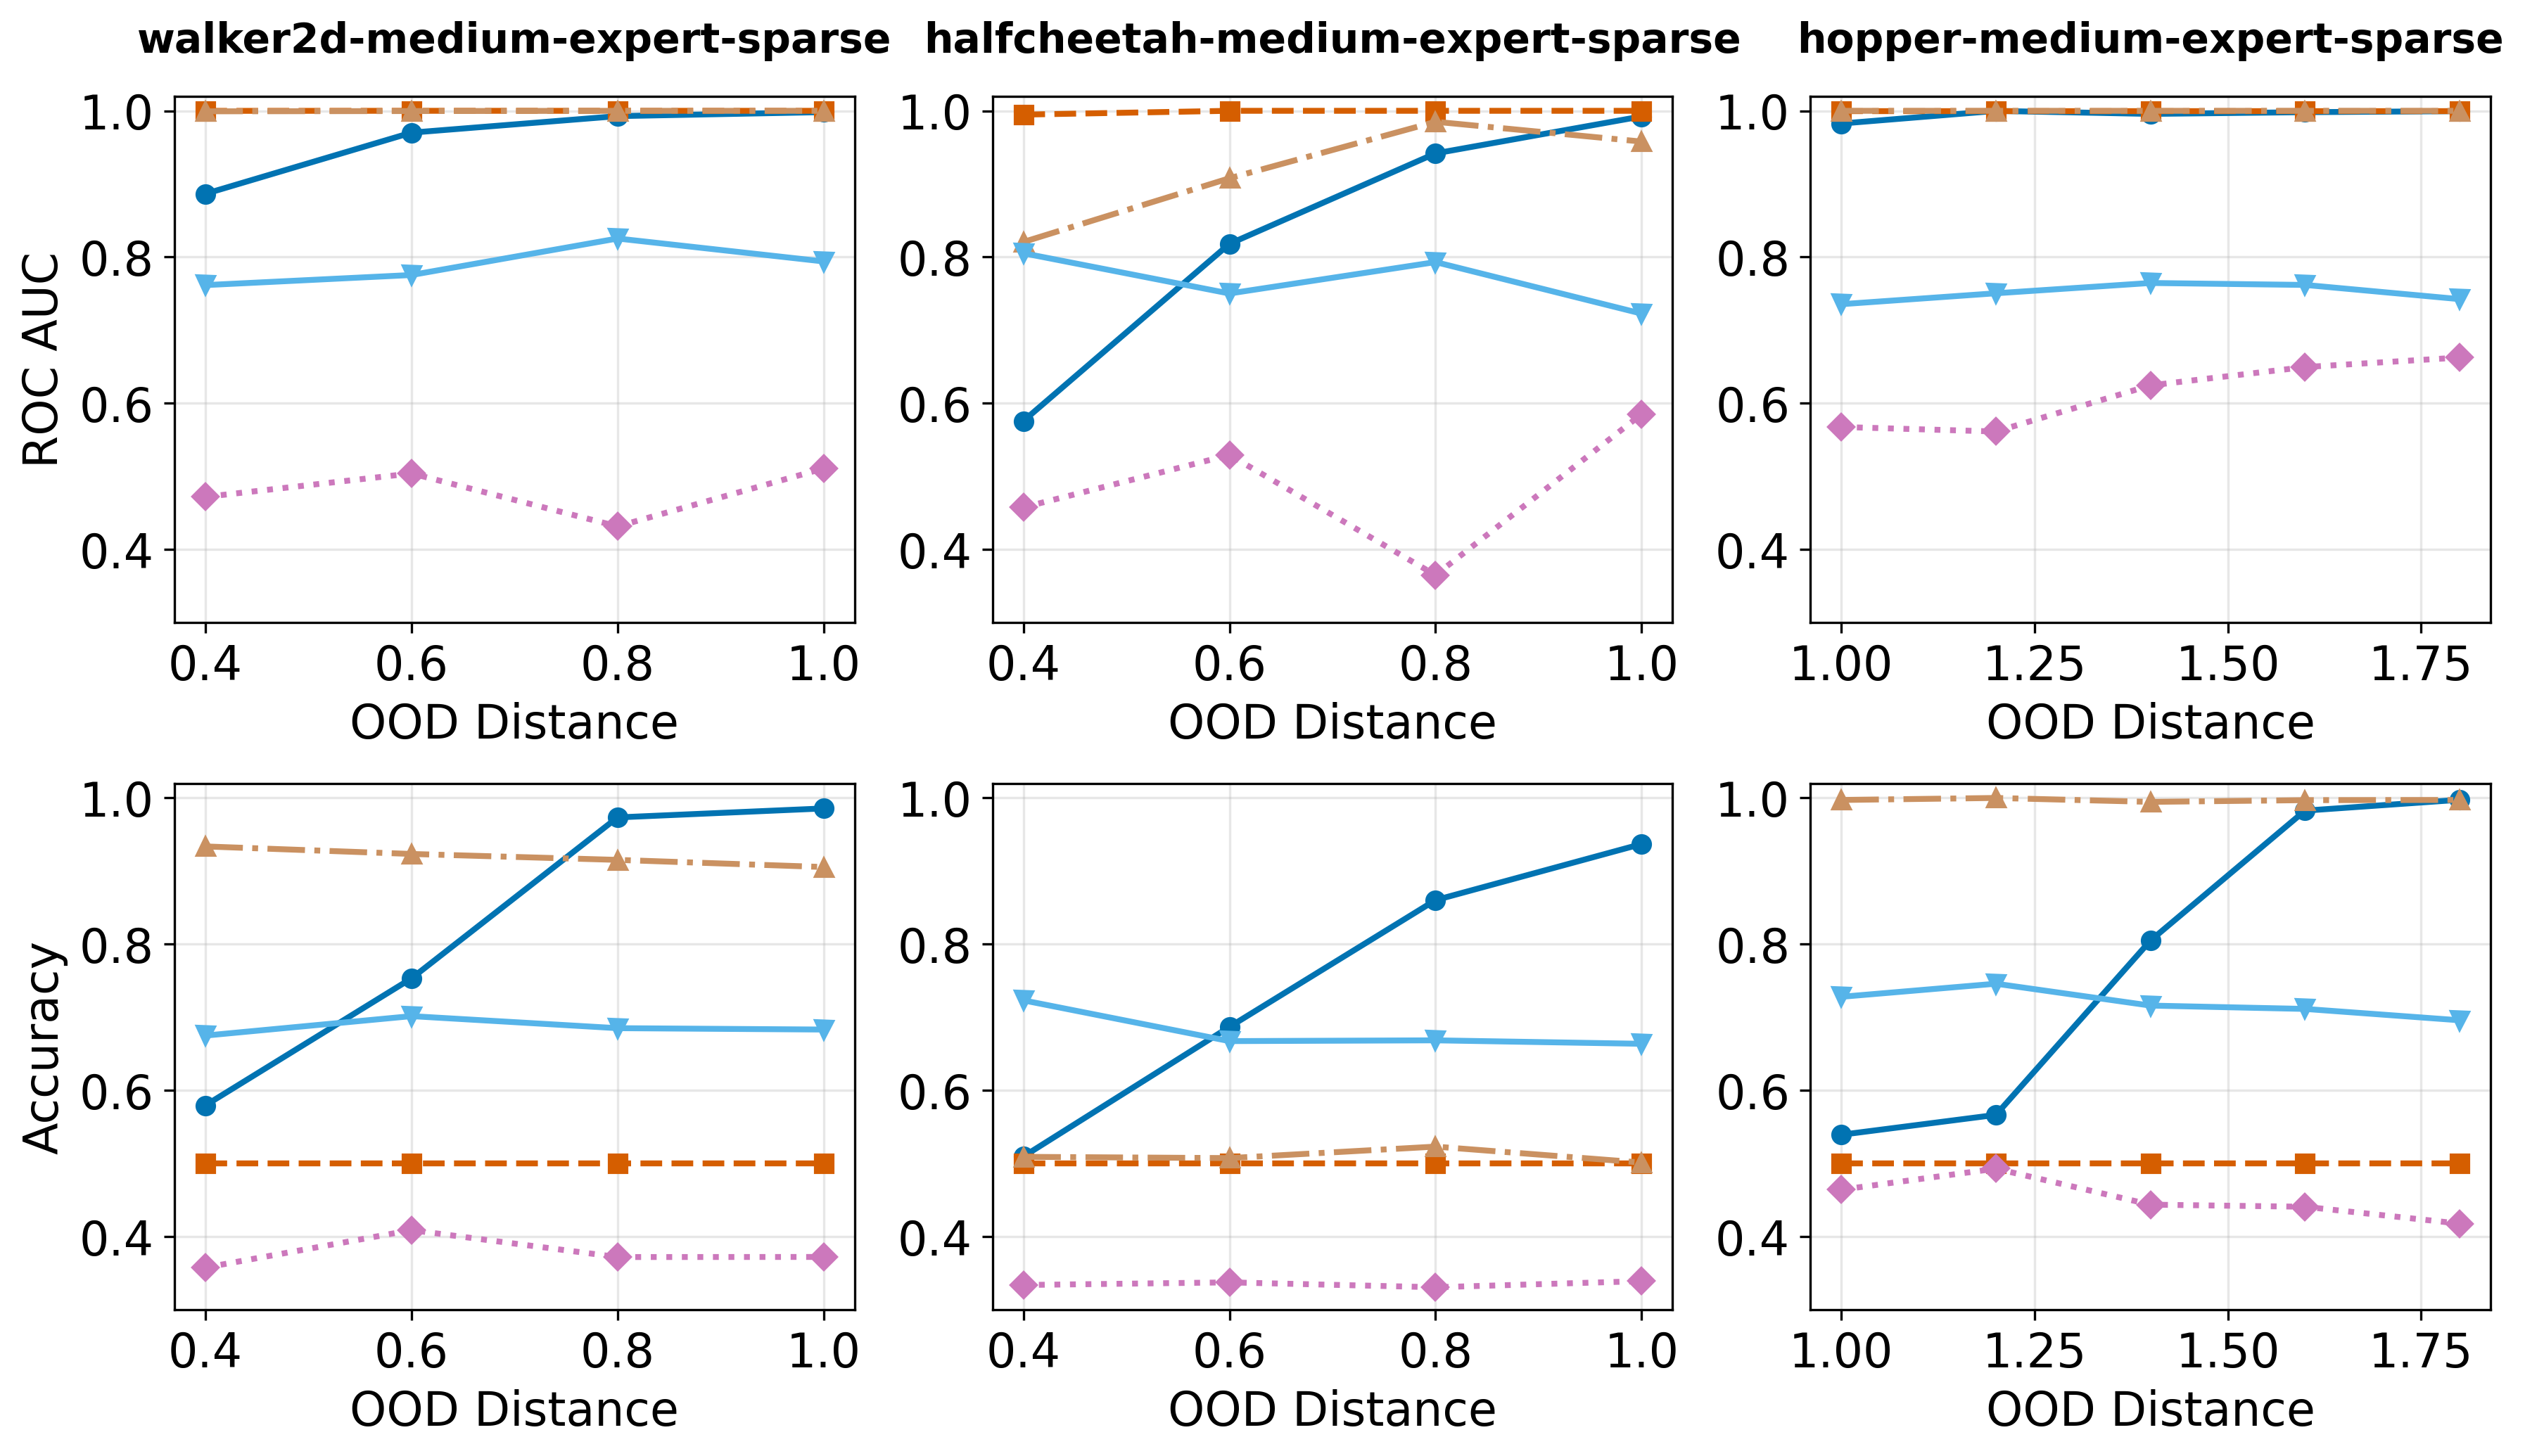


Combined plot created successfully!


In [4]:
import seaborn as sns
palette = sns.color_palette('colorblind')
colors = [palette[i] for i in [3, 0, 5, 4, 9]]

# Define colors and markers for each method
method_styles = {
    'VAE': {'color': colors[1], 'marker': 'o', 'linestyle': '-'},
    'KDE': {'color': colors[0], 'marker': 's', 'linestyle': '--'},
    'RealNVP': {'color': colors[2], 'marker': '^', 'linestyle': '-.'},
    'Diffusion': {'color': colors[3], 'marker': 'D', 'linestyle': ':'},
    'NeuralODE': {'color': colors[4], 'marker': 'v', 'linestyle': '-'}
}

def format_dataset_title(name):
    """Convert 'walker2d_medium_expert_sparse_73' to 'walker2d-medium-expert-sparse'"""
    # Remove trailing number (after last underscore if it's a number)
    parts = name.rsplit('_', 1)
    if len(parts) == 2 and parts[1].replace('.', '').isdigit():
        name = parts[0]
    # Replace underscores with hyphens
    return name.replace('_', '-')

# Get dataset names in a consistent order
dataset_names = list(results_by_dataset.keys())
num_datasets = len(dataset_names)

# Create figure with 2 rows x 3 columns (all datasets side by side)
fig, axes = plt.subplots(2, num_datasets, figsize=(4 * num_datasets, 7), dpi=300)

# Handle case when there's only one dataset
if num_datasets == 1:
    axes = axes.reshape(-1, 1)

for col, dataset_name in enumerate(dataset_names):
    methods_data = results_by_dataset[dataset_name]
    display_title = format_dataset_title(dataset_name)
    
    # Plot 1: ROC AUC (top row)
    ax1 = axes[0, col]
    for method_name, data in methods_data.items():
        distances = [d['distance'] for d in data]
        roc_auc = [d['roc_auc'] for d in data]
        style = method_styles[method_name]
        ax1.plot(distances, roc_auc, label=method_name, 
                color=style['color'], marker=style['marker'], 
                linestyle=style['linestyle'], linewidth=2, markersize=6)
    
    ax1.set_title(display_title, fontsize=14, fontweight='bold', y=1.05)
    ax1.set_xlabel('OOD Distance', fontsize=16)
    if col == 0:
        ax1.set_ylabel('ROC AUC', fontsize=16)
    ax1.tick_params(axis='both', labelsize=16)
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim([0.3, 1.02])
    
    # Plot 2: Accuracy (bottom row)
    ax2 = axes[1, col]
    for method_name, data in methods_data.items():
        distances = [d['distance'] for d in data]
        accuracy = [d['accuracy'] for d in data]
        style = method_styles[method_name]
        ax2.plot(distances, accuracy, label=method_name, 
                color=style['color'], marker=style['marker'], 
                linestyle=style['linestyle'], linewidth=2, markersize=6)
    
    ax2.set_xlabel('OOD Distance', fontsize=16)
    if col == 0:
        ax2.set_ylabel('Accuracy', fontsize=16)
    ax2.tick_params(axis='both', labelsize=16)
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim([0.3, 1.02])

# # Add a single legend for the entire figure
# handles, labels = axes[0, 0].get_legend_handles_labels()
# fig.legend(handles, labels, loc='lower center', ncol=len(method_styles), 
#            fontsize=12, bbox_to_anchor=(0.5, 1.02))

plt.tight_layout()
# plt.subplots_adjust(top=0.92)

# Save the combined figure
output_dir = base_dir / 'merged_results'
output_dir.mkdir(exist_ok=True)
output_file = output_dir / 'all_datasets_comparison.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"Saved: {output_file}")

plt.show()

print("\nCombined plot created successfully!")

Saved: /home/ubuntu/GORMPO/figures/merged_results/all_datasets_tnr_tpr_comparison.png


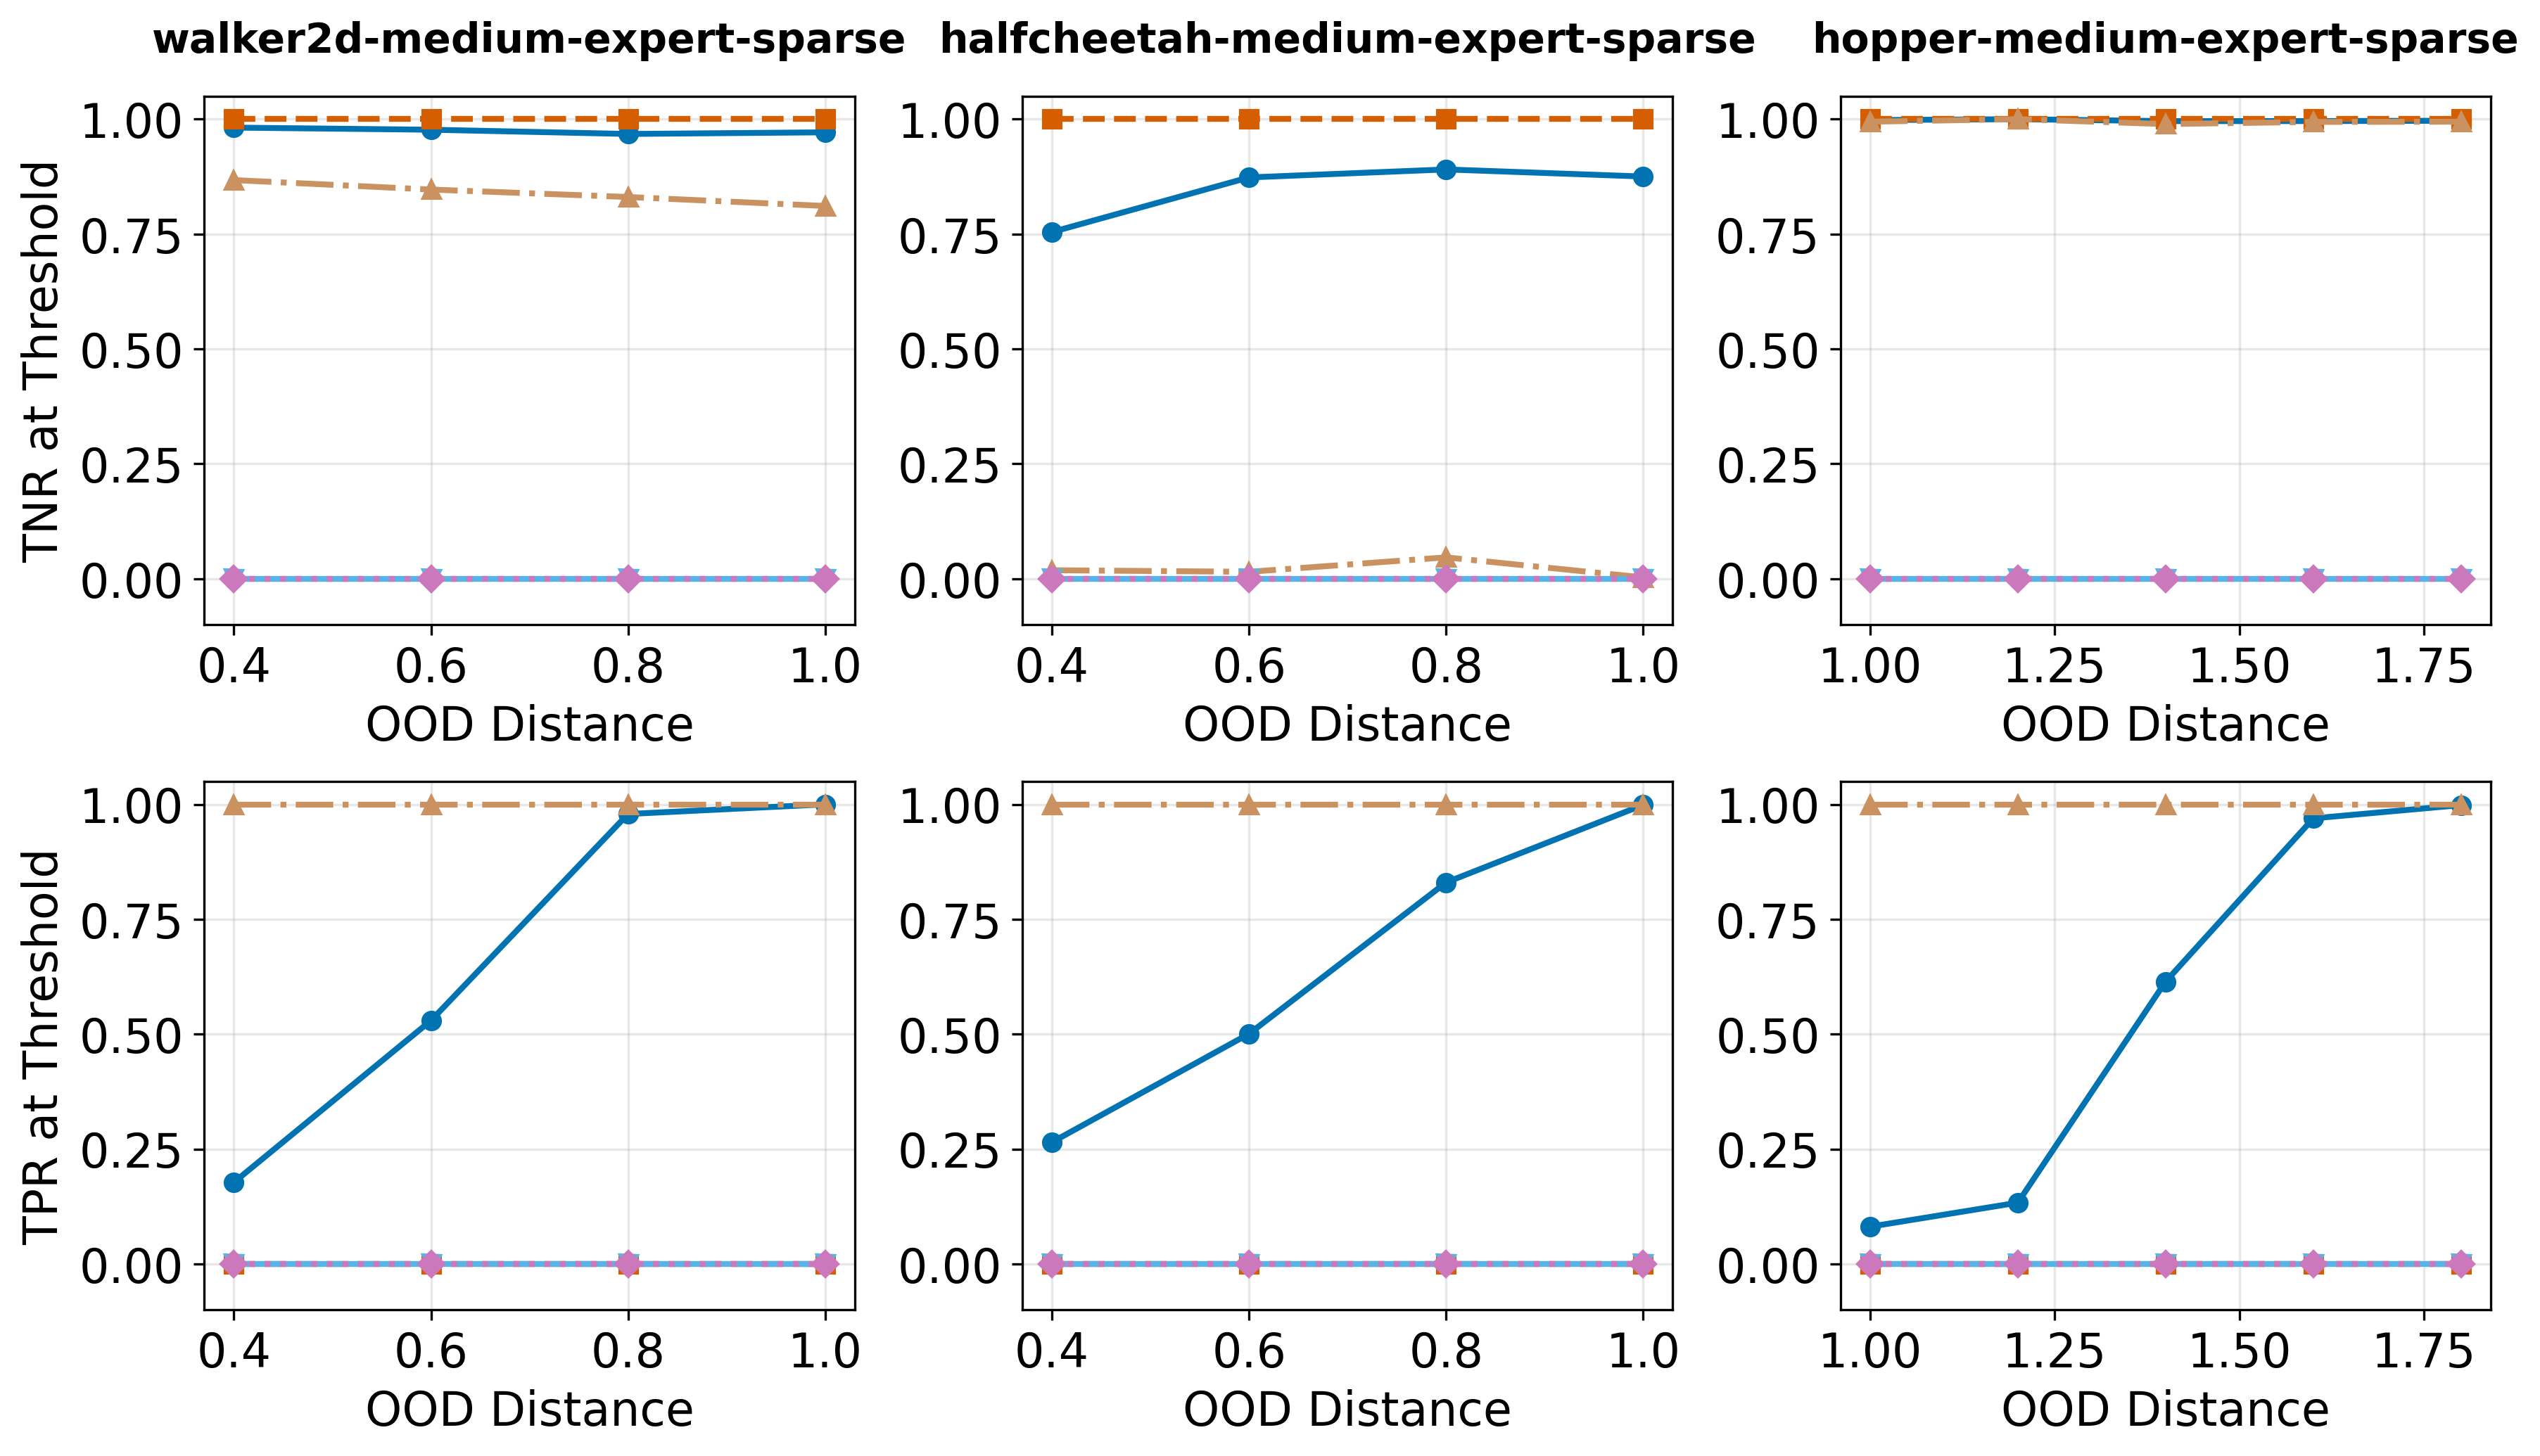


TNR/TPR plot created successfully!


In [7]:
# Plot TNR at Threshold and TPR at Threshold metrics
# Create figure with 2 rows x 3 columns (all datasets side by side)
fig, axes = plt.subplots(2, num_datasets, figsize=(4 * num_datasets, 7), dpi=300)

# Handle case when there's only one dataset
if num_datasets == 1:
    axes = axes.reshape(-1, 1)

for col, dataset_name in enumerate(dataset_names):
    methods_data = results_by_dataset[dataset_name]
    display_title = format_dataset_title(dataset_name)
    
    # Plot 1: TNR at Threshold (top row)
    ax1 = axes[0, col]
    for method_name, data in methods_data.items():
        distances = [d['distance'] for d in data]
        tnr = [d.get('tnr_at_threshold', 0) for d in data]
        style = method_styles[method_name]
        ax1.plot(distances, tnr, label=method_name, 
                color=style['color'], marker=style['marker'], 
                linestyle=style['linestyle'], linewidth=2, markersize=6)
    
    ax1.set_title(display_title, fontsize=14, fontweight='bold', y=1.05)
    ax1.set_xlabel('OOD Distance', fontsize=16)
    if col == 0:
        ax1.set_ylabel('TNR at Threshold', fontsize=16)
    ax1.tick_params(axis='both', labelsize=16)
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim([-0.1, 1.05])
    
    # Plot 2: TPR at Threshold (bottom row)
    ax2 = axes[1, col]
    for method_name, data in methods_data.items():
        distances = [d['distance'] for d in data]
        tpr = [d.get('tpr_at_threshold', 0) for d in data]
        style = method_styles[method_name]
        ax2.plot(distances, tpr, label=method_name, 
                color=style['color'], marker=style['marker'], 
                linestyle=style['linestyle'], linewidth=2, markersize=6)
    
    ax2.set_xlabel('OOD Distance', fontsize=16)
    if col == 0:
        ax2.set_ylabel('TPR at Threshold', fontsize=16)
    ax2.tick_params(axis='both', labelsize=16)
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim([-0.1, 1.05])

plt.tight_layout()

# Save the combined figure
output_file = output_dir / 'all_datasets_tnr_tpr_comparison.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"Saved: {output_file}")

plt.show()

print("\nTNR/TPR plot created successfully!")

/tmp/ipykernel_3598911/769917206.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


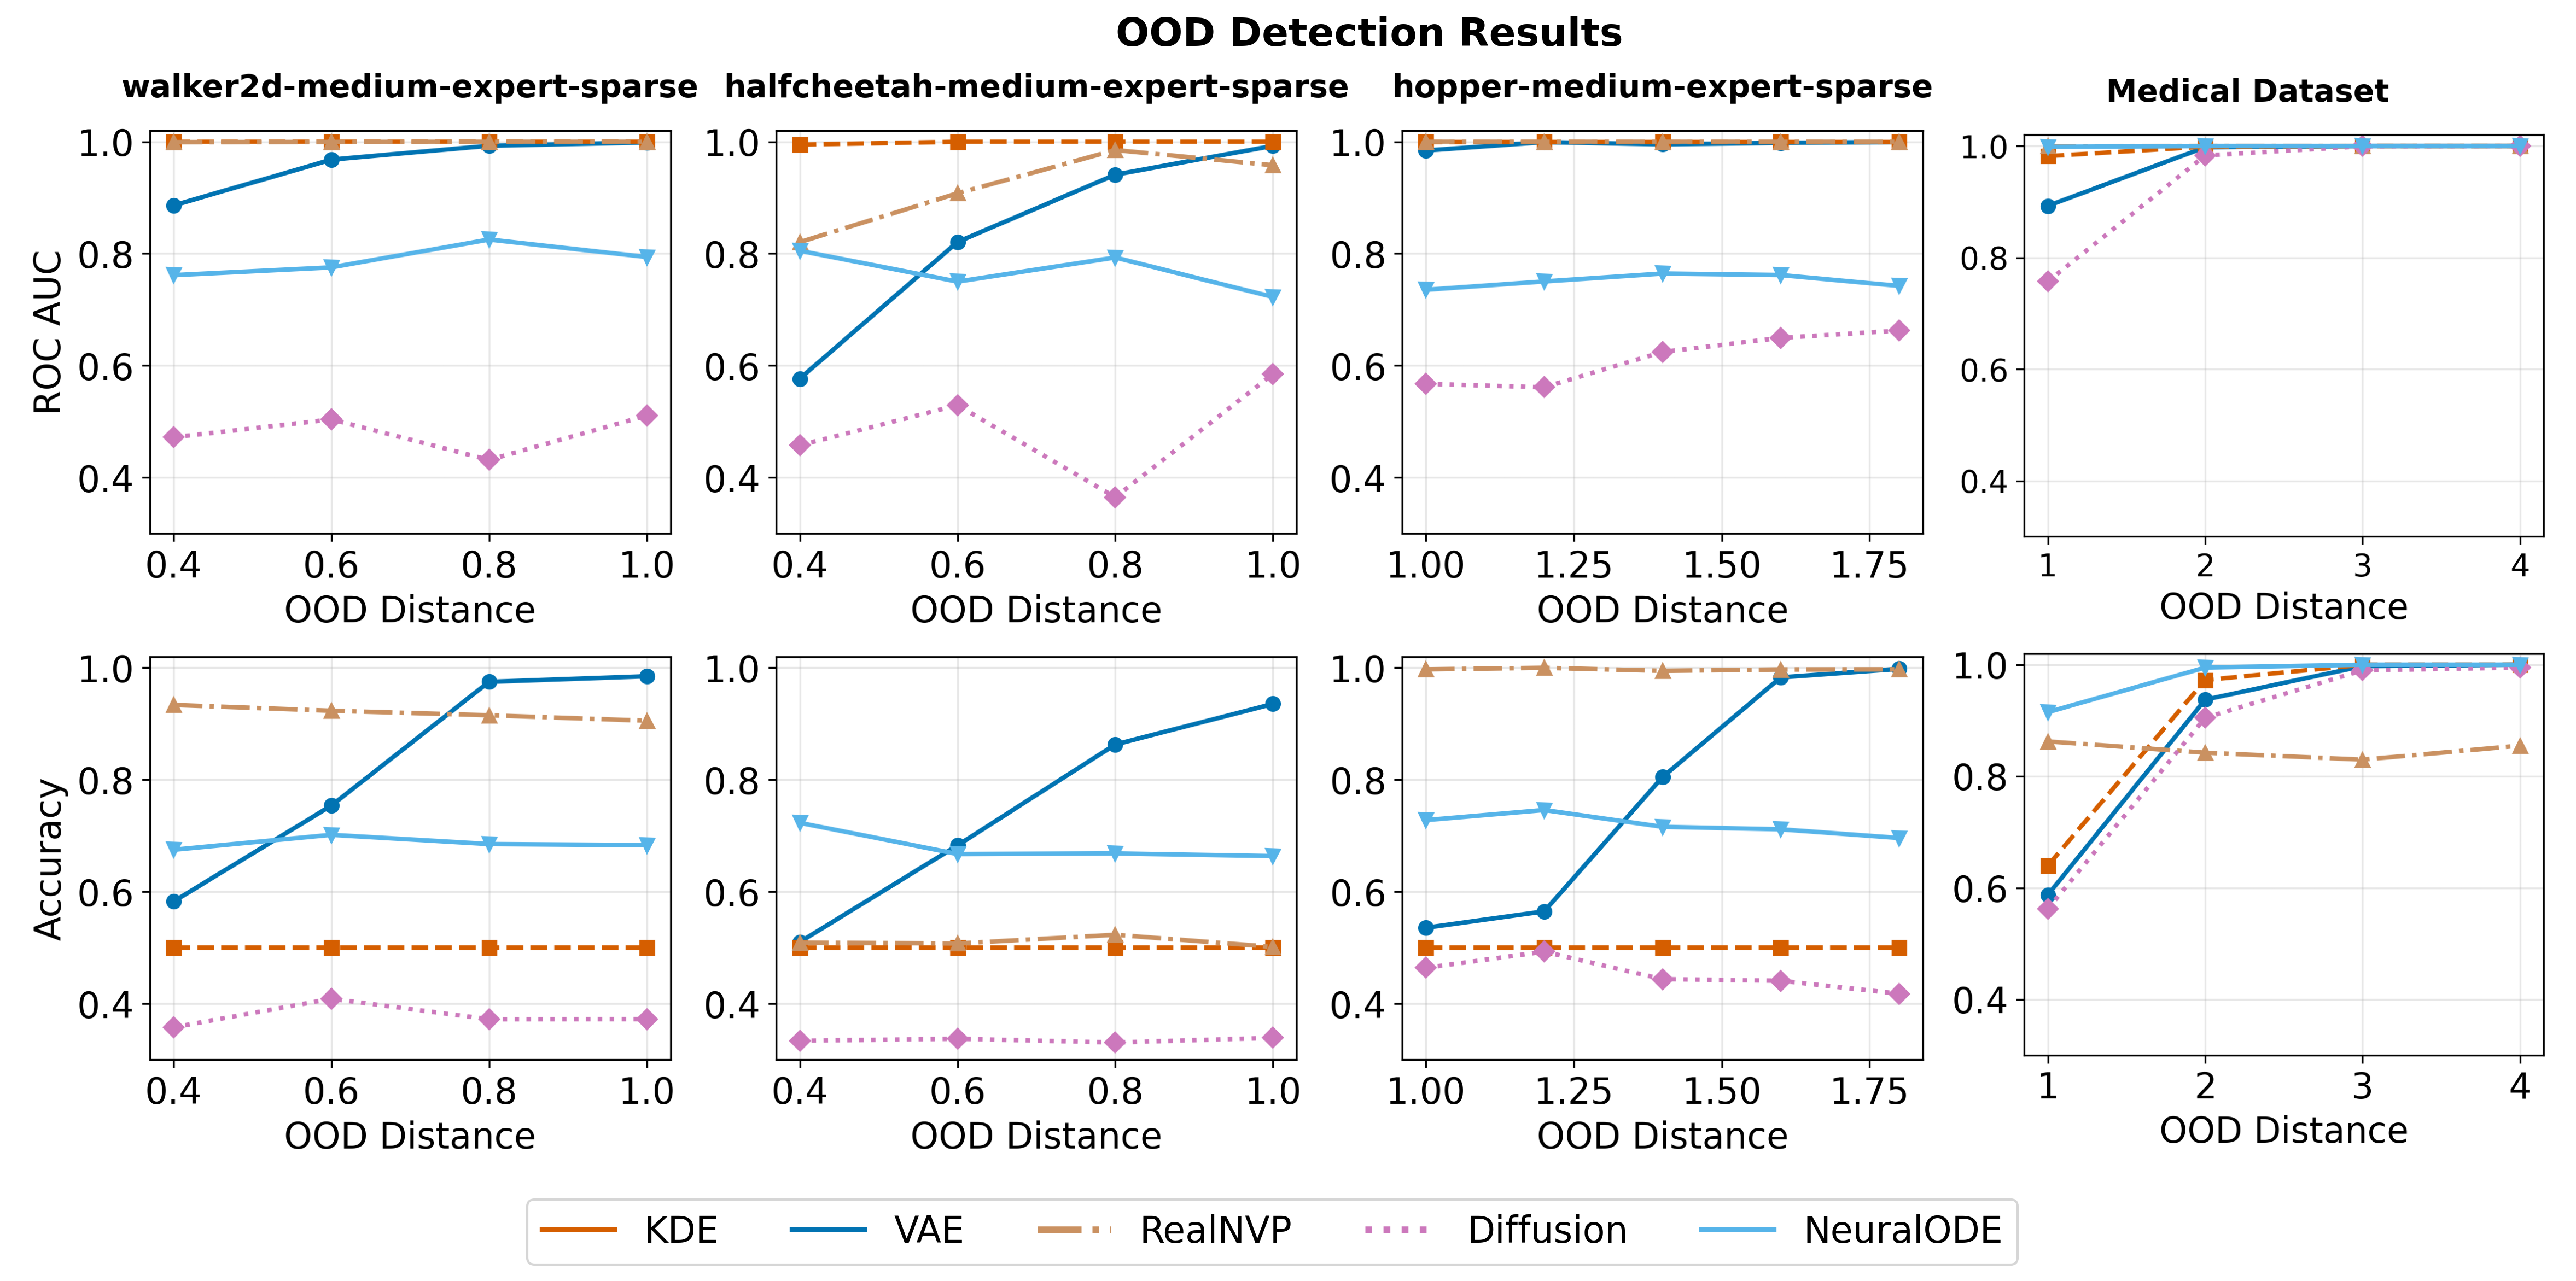

In [3]:
# fig1 = plt.imread("eval_sample_bc.png")
fig1 = plt.imread("/home/ubuntu/GORMPO/figures/merged_results/all_datasets_comparison.png")

fig2 = plt.imread("/home/ubuntu/GORMPO/figures/merged_results/abiomed_ood.png")
palette = sns.color_palette('colorblind')
colors = [palette[i] for i in [3, 0, 5, 4, 9]]

fig = plt.figure(figsize=(20, 10), dpi=300)
gs = gridspec.GridSpec(1, 2, figure=fig, wspace=-0.01, hspace=-0.9, width_ratios=[3.1, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
#ax6 = fig.add_subplot(gs[2, 1])
#fig.suptitle('Evaluation Samples', fontsize=16)
ax1.imshow(fig1)
ax1.text(0.7, 1.02, 'OOD Detection Results', va='center', ha='center', rotation='horizontal',
         size="xx-large", color='black', transform=ax1.transAxes, fontweight="bold")
ax1.axis('off')
ax2.imshow(fig2)
# ax2.set_title('MBPO', fontweight="bold", size='xx-large')

ax2.axis('off')

legend_elements = [
    Line2D([0], [0], color=colors[0], linestyle='-', lw=2, label='KDE'),
    Line2D([0], [0], color=colors[1], linestyle='-', lw=2, label='VAE'),
            Line2D([0], [0], color=colors[2], linestyle='-.', lw=3, label='RealNVP'),

    Line2D([0], [0], color=colors[3], linestyle=':', lw=3, label='Diffusion'),
#     Line2D([0], [0], color='tab:orange', linestyle='--', lw=2, label='Observed HR'),
#     Line2D([0], [0], color='tab:orange', linestyle='-', lw=2, label='Predicted HR'),    
#   Line2D([0], [0], color='tab:green', linestyle='--', lw=2, label='Observed PULSAT'),
#     Line2D([0], [0], color='tab:green', linestyle='-', lw=2, label='Predicted PULSAT'),  
        Line2D([0], [0], color=colors[4], linestyle='-', lw=2, label='NeuralODE'),  
]
# #print the labels
ax1.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.65, -0.1), ncol=5,  fontsize=16)

plt.tight_layout()
# plt.savefig('eval_samples_all.png', bbox_inches='tight', dpi=300)

In [4]:
# Optional: Create a summary table showing key metrics
import pandas as pd

print("\n" + "="*80)
print("SUMMARY OF RESULTS")
print("="*80)

for dataset_name, methods_data in results_by_dataset.items():
    print(f"\n{dataset_name}:")
    print("-" * 80)
    
    for method_name, data in methods_data.items():
        print(f"\n  {method_name}:")
        df = pd.DataFrame(data)
        print(df.to_string(index=False))
    print()


SUMMARY OF RESULTS

walker2d_medium_expert_sparse_73:
--------------------------------------------------------------------------------

  VAE:
 distance  mean_log_likelihood  id_log_likelihood  ood_log_likelihood  roc_auc  accuracy
      0.4            -6.171754          -3.585427           -8.758082 0.886151  0.582669
      0.6            -9.367003          -3.826659          -14.907348 0.967913  0.753917
      0.8           -12.986513          -4.259336          -21.713690 0.992747  0.975035
      1.0           -18.500734          -4.094126          -32.907345 0.998713  0.984997

  KDE:
 distance  mean_log_likelihood  id_log_likelihood  ood_log_likelihood  roc_auc  accuracy
      0.4            -9.809834          -0.733926          -18.885744 0.999925       0.5
      0.6           -11.916348          -0.820846          -23.011852 1.000000       0.5
      0.8           -12.058744          -1.091639          -23.025850 1.000000       0.5
      1.0           -12.018816          -1.0117